## PASCAL VOC 2012 데이터 다운받고 분석해보기


In [1]:
!mkdir /content/data

!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
VOCdevkit/VOC2012/SegmentationClass/2008_001874.png
VOCdevkit/VOC2012/SegmentationClass/2008_001876.png
VOCdevkit/VOC2012/SegmentationClass/2008_001882.png
VOCdevkit/VOC2012/SegmentationClass/2008_001885.png
VOCdevkit/VOC2012/SegmentationClass/2008_001895.png
VOCdevkit/VOC2012/SegmentationClass/2008_001896.png
VOCdevkit/VOC2012/SegmentationClass/2008_001926.png
VOCdevkit/VOC2012/SegmentationClass/2008_001966.png
VOCdevkit/VOC2012/SegmentationClass/2008_001971.png
VOCdevkit/VOC2012/SegmentationClass/2008_001992.png
VOCdevkit/VOC2012/SegmentationClass/2008_001997.png
VOCdevkit/VOC2012/SegmentationClass/2008_002032.png
VOCdevkit/VOC2012/SegmentationClass/2008_002043.png
VOCdevkit/VOC2012/SegmentationClass/2008_002064.png
VOCdevkit/VOC2012/SegmentationClass/2008_002066.png
VOCdevkit/VOC2012/SegmentationClass/2008_002067.png
VOCdevkit/VOC2012/SegmentationClass/2008_002073.png
VOCdevkit/VOC2012/SegmentationClass/2008_002079.png
VOCdevkit/VOC2012/Segmentati

In [2]:
!ls /content/data/VOCdevkit/VOC2012/JPEGImages | head -n 5

2007_000027.jpg
2007_000032.jpg
2007_000033.jpg
2007_000039.jpg
2007_000042.jpg


#### JPEGImages 폴더에 있는 임의의 이미지 보기

(500, 486, 3)


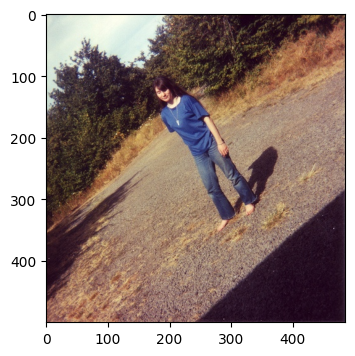

In [3]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

default_dir = '/content/data'
img = cv2.imread(os.path.join(default_dir, '/content/data/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(4,4))
plt.imshow(img_rgb)
plt.show()

#### Anotations 디렉토리 안에 있는 임의의 annotation 파일 보기

In [4]:
! cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000027.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000027.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>486</width>
		<height>500</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>person</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>174</xmin>
			<ymin>101</ymin>
			<xmax>349</xmax>
			<ymax>351</ymax>
		</bndbox>
		<part>
			<name>head</name>
			<bndbox>
				<xmin>169</xmin>
				<ymin>104</ymin>
				<xmax>209</xmax>
				<ymax>146</ymax>
			</bndbox>
		</part>
		<part>
			<name>hand</name>
			<bndbox>
				<xmin>278</xmin>
				<ymin>210</ymin>
				<xmax>297</xmax>
				<ymax>233</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot</name>
			<bndbox>
				<xmin>273</xmin>
				<ymin>333</ymin>
				<xmax>297</xmax>
				<ymax>354</ymax>
			</bndbox>
		</part>
		<part>
			<name>foot<

#### SegmetationObject 디렉토리에 있는 임의의 masking 이미지 보기


(281, 500, 3)


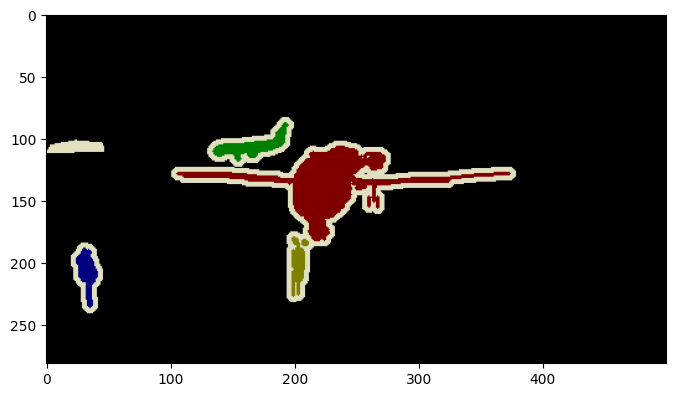

In [5]:
img = cv2.imread(os.path.join(default_dir, '/content/data/VOCdevkit/VOC2012/SegmentationObject/2007_000032.png'))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

#### Annotation xml파일에 있는 요소들을
* ElmentTree를 이용해서 xlm 파싱
* 참고로 파싱은 문장이 이루고 있는 구성 성분을 분해하고 분해된 성분의 위계 관계를 분석해 구조를 결정하는 것임.

In [10]:
import os
import random

VOC_ROOT_DIR = '/content/data/VOCdevkit/VOC2012'
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, 'JPEGImages')

xml_files = os.listdir(ANNO_DIR)
print(xml_files[:5])
print(len(xml_files))

['2010_000063.xml', '2010_005930.xml', '2008_006265.xml', '2012_001997.xml', '2012_002281.xml']
17125


In [20]:
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000027.xml')

# XML 파일을 parsing하여 element 생성
tree = ET.parse(xml_file)
root = tree.getroot()  # element 'annotation'을 불러옴

# image 관련 정보는 root의 자식으로 존재함
image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

# 파일내에 있는 모든 object element를 찾는다
objects_list = []
for obj in root.findall('object'):
  # object element의 자식 element에게 boundbox를 찾음
  xmlbox = obj.find('bndbox')
  # boundbox element의 자식 element에서 xmin, ymin, xmax, ymax를 찾고 값 추출
  x1 = int(xmlbox.find('xmin').text)
  y1 = int(xmlbox.find('ymin').text)
  x2 = int(xmlbox.find('xmax').text)
  y2 = int(xmlbox.find('ymax').text)

  bndbox_pos = (x1, y1, x2, y2)
  class_name = obj.find('name').text
  object_dict = {'class_name':class_name, 'bndbox_pos':bndbox_pos}
  objects_list.append(object_dict)

print('이미지 전체 이름: ', full_image_name)
print('이미지 너비와 높이: ',image_width, image_height)

for object in objects_list:
  print(object)

이미지 전체 이름:  /content/data/VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg
이미지 너비와 높이:  486 500
{'class_name': 'person', 'bndbox_pos': (174, 101, 349, 351)}


#### Annotation내의 obejct들의 bounding box 정보를 이용해 bounding box 시각화

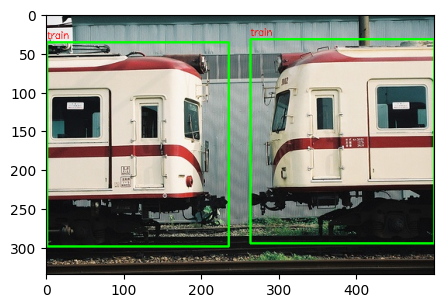

In [22]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000042.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR, image_name)

img = cv2.imread(full_image_name)
# opencv의 인자로 rectangle()은 인자로 들어온 이미지 배열에 그대로 사격형을 그려 따로 이미지를 뽑아 작업한다
draw_img = img.copy()
green_color = (0, 255, 0)
red_color = (0, 0, 255)  # opencv는 BGR 순서

# 파일내에 모든 object element를 찾는다
objects_list = []
for obj in root.findall('object'):
  xmlbox = obj.find('bndbox')

  left = int(xmlbox.find('xmin').text)
  top = int(xmlbox.find('ymin').text)
  right = int(xmlbox.find('xmax').text)
  bottom = int(xmlbox.find('ymax').text)

  class_name = obj.find('name').text

  # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시
  cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=2)
  # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
  cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(img_rgb)